## DESAFIO COMPLEMENTARIO 2: Cross Validation y mejora de modelos ML

- Proyecto: Robos y recuperos de autos en Argentina en 2022 y 2023
- Alumna: Gimena Sozzi
- Curso: Data Science
- Comisión: 49140

Dataset elegido:

**dataset_robos_autos_2022_2023.csv** (https://datos.gob.ar/dataset/justicia-robos-recuperos-autos)




## 1. Introducción ##

**1.1. Abstract del Proyecto**

Este estudio se enfoca en el análisis de los robos de autos en Argentina durante los años 2022 y 2023. La motivación es proporcionar insights clave para entidades como autoridades de seguridad, compañías de seguros y propietarios de vehículos en Argentina, con el objetivo de desarrollar estrategias efectivas para prevenir y responder a estos incidentes. La audiencia principal incluye analistas de datos, funcionarios de seguridad pública y profesionales del sector asegurador en Argentina.

**1.2. Definición del Objetivo**

El objetivo es identificar patrones y tendencias en los robos de autos en Argentina, para comprender mejor este fenómeno y contribuir a la creación de medidas preventivas más efectivas.

**1.3. Formulación de Preguntas e Hipótesis**

a) Pregunta: ¿Cuáles son los modelos y marcas de autos más frecuentemente robados en Argentina durante 2022 y 2023?

Hipótesis: Los autos de ciertas marcas y modelos específicos son más propensos a ser robados, posiblemente debido a su mayor valor en el mercado o a su demanda en el mercado negro.

b) Pregunta: ¿Existe una variación significativa en la incidencia de robos de autos entre las diferentes provincias argentinas?

Hipótesis: Las provincias con mayores centros urbanos, como Buenos Aires y Córdoba, tienen tasas más altas de robo de autos debido a su mayor densidad de población y actividad económica.

c) Pregunta: ¿Cómo varían los robos de autos a lo largo del año? ¿Hay meses específicos con mayor incidencia?

Hipótesis: Los robos de autos podrían aumentar en ciertos meses debido a factores estacionales, como vacaciones o festividades, cuando los autos pueden quedar más tiempo sin vigilancia.

d) Pregunta: ¿Hay alguna correlación entre el año del modelo del auto y la frecuencia de robo?

Hipótesis: Los autos de modelos más recientes podrían ser más propensos a robos, presumiblemente por su mayor valor de reventa.


**1.4. Contexto Comercial y Problema Comercial**

En Argentina, los robos de autos representan un problema significativo que impacta no solo a individuos sino también a la economía y la seguridad pública. Para las compañías de seguros, estos incidentes resultan en mayores reclamaciones y, por ende, en un aumento en las primas de seguros. Para la policía, es un desafío que requiere una asignación eficiente de recursos.

**1.5. Contexto Analítico**

Este análisis se enmarca en un contexto analítico que busca comprender las dinámicas detrás de los robos de autos en Argentina, empleando herramientas estadísticas y de visualización de datos para identificar tendencias y patrones clave.

## 2. Exploración de Datos Inicial ##


En esta sección, realizaremos una exploración inicial de nuestro dataset de robos de autos en Argentina durante los años 2022 y 2023. El objetivo es obtener una comprensión general de la estructura de los datos, identificar posibles problemas de calidad (como valores faltantes o atípicos) y entender mejor la distribución y tendencias de los incidentes reportados. Comenzaremos con algunas estadísticas descriptivas básicas, seguidas de visualizaciones para explorar la distribución de los años de modelo de los automotores y la frecuencia de robos por provincia.


**2.1. Importaciones para manejo de datos y visualización y carga del dataset**

In [49]:
# Importación de paquetes y librerías
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re
import matplotlib.pyplot as plt
import missingno as msno

In [50]:
# Carga del dataset
df_robos_autos = pd.read_csv('dataset_robos_autos_2022_2023.csv', encoding='latin1')

C:\Users\MegaTecnologia\AppData\Local\Temp\ipykernel_13084\2407759731.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_robos_autos = pd.read_csv('dataset_robos_autos_2022_2023.csv', encoding='latin1')


**2.2. Estadísticas Descriptivas Básicas**

2.2.1. Lectura y exploración inicial del dataset

In [51]:
# Tamaño original del dataset.
print(f'El tamaño original del dataset es (filas, columnas):\n{df_robos_autos.shape}')

El tamaño original del dataset es (filas, columnas):
(83834, 25)


In [52]:
# Primeras 5 filas para observar cómo se organizan los datos y qué tipo de información tiene cada columna
df_primeras_5 = df_robos_autos.head()
print(f'Primeras 5 filas del dataset:\n{df_primeras_5}')

Primeras 5 filas del dataset:
                                    tramite_tipo tramite_fecha  \
0  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-18   
1  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-31   
2  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-11   
3  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-10   
4  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-24   

  fecha_inscripcion_inicial  registro_seccional_codigo  \
0                1994-06-03                       1173   
1                2000-10-27                       1120   
2                1994-04-28                       2086   
3                1992-03-27                       1119   
4                2000-11-01                       1118   

  registro_seccional_descripcion registro_seccional_provincia  \
0              BERAZATEGUI NÂº 2                 Buenos Aires   
1              LA MATANZA NÂº 03                 Buenos Aires   
2        CAPITAL FEDERAL NÂº 

In [53]:
# Identificamos tipos de datos y presencia de valores nulos.
print(f'Información general del dataset:')
df_robos_autos.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83834 entries, 0 to 83833
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tramite_tipo                    83834 non-null  object 
 1   tramite_fecha                   83834 non-null  object 
 2   fecha_inscripcion_inicial       83833 non-null  object 
 3   registro_seccional_codigo       83834 non-null  int64  
 4   registro_seccional_descripcion  83834 non-null  object 
 5   registro_seccional_provincia    83834 non-null  object 
 6   automotor_origen                83834 non-null  object 
 7   automotor_anio_modelo           83660 non-null  float64
 8   automotor_tipo_codigo           81435 non-null  object 
 9   automotor_tipo_descripcion      83834 non-null  object 
 10  automotor_marca_codigo          82802 non-null  object 
 11  automotor_marca_descripcion     83834 non-null  object 
 12 

In [54]:
# Obtenemos una descripción estadística de las columnas numéricas para identificar distribuciones, posibles valores atípicos y errores en los datos.
df_descripcion = df_robos_autos.describe()
print(f'Descripción estadística de las columnas numéricas:\n{df_descripcion}')

Descripción estadística de las columnas numéricas:
       registro_seccional_codigo  automotor_anio_modelo  automotor_uso_codigo  \
count               83834.000000           83660.000000          83831.000000   
mean                 3415.922764            2007.051685              1.009805   
std                  5176.869866              33.200848              0.238237   
min                  1001.000000              20.000000              0.000000   
25%                  1161.000000            2001.000000              1.000000   
50%                  1253.000000            2009.000000              1.000000   
75%                  2065.000000            2013.000000              1.000000   
max                 24008.000000            2023.000000              9.000000   

       titular_anio_nacimiento  titular_porcentaje_titularidad  \
count             83820.000000                    83834.000000   
mean               1978.439621                       97.713684   
std                  

**2.3. Visualizaciones Iniciales**

2.3.1. Histograma de los años de modelos de los automotores robados

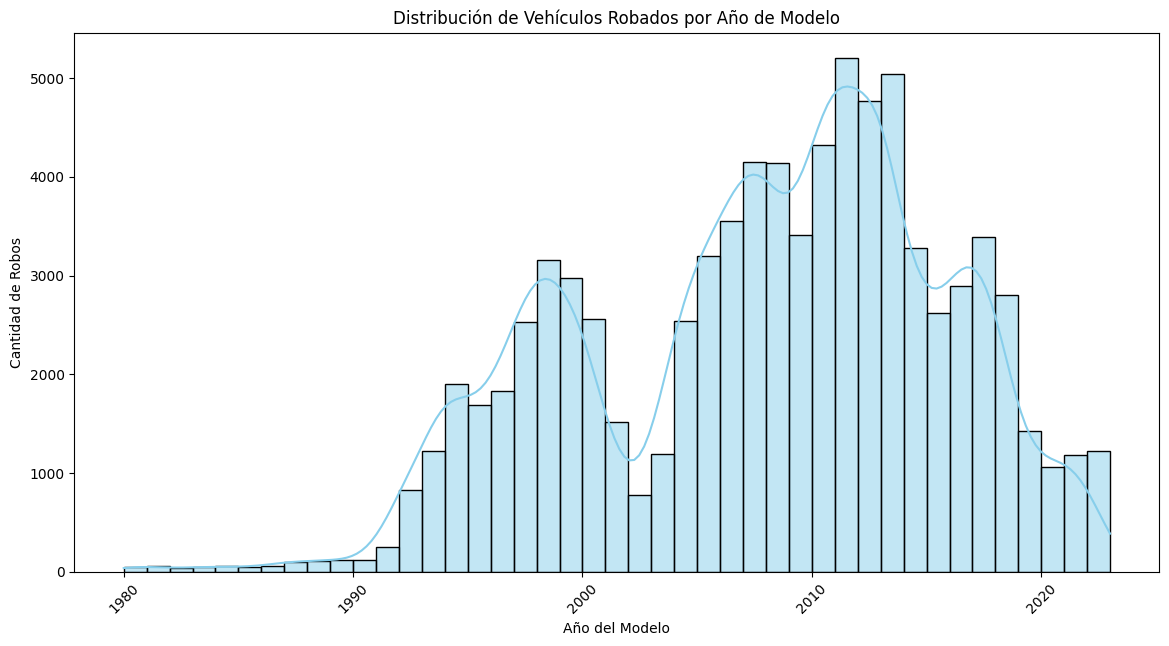

In [55]:
# Filtrando datos para asegurar años de modelo razonables
df_robos_autos_filtered = df_robos_autos[(df_robos_autos['automotor_anio_modelo'] >= 1980) & (df_robos_autos['automotor_anio_modelo'] <= 2023)]

# Creando el histograma
plt.figure(figsize=(14, 7))
sns.histplot(df_robos_autos_filtered['automotor_anio_modelo'], bins=43, kde=True, color="skyblue")
plt.title('Distribución de Vehículos Robados por Año de Modelo')
plt.xlabel('Año del Modelo')
plt.ylabel('Cantidad de Robos')
plt.xticks(rotation=45)

# Guardando el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_hist_anios_modelos.png') 

# Mostrando el gráfico
plt.show()

El siguiente histograma muestra la distribución de los vehículos robados según su año de modelo. Se observa una tendencia en la cual los autos cuyos modelos se encuentran entre los años 2010 y 2015 tienen una alta frecuenta de robos. Esta visualización es fundamental para entender la relación entre la antigüedad del vehículo y su vulnerabilidad al robo.

2.3.2. Gráfico de Barras para la Frecuencia de Robos por Provincia

C:\Users\MegaTecnologia\AppData\Local\Temp\ipykernel_13084\2932429165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_counts.values, y=provincia_counts.index, palette="Blues_d")


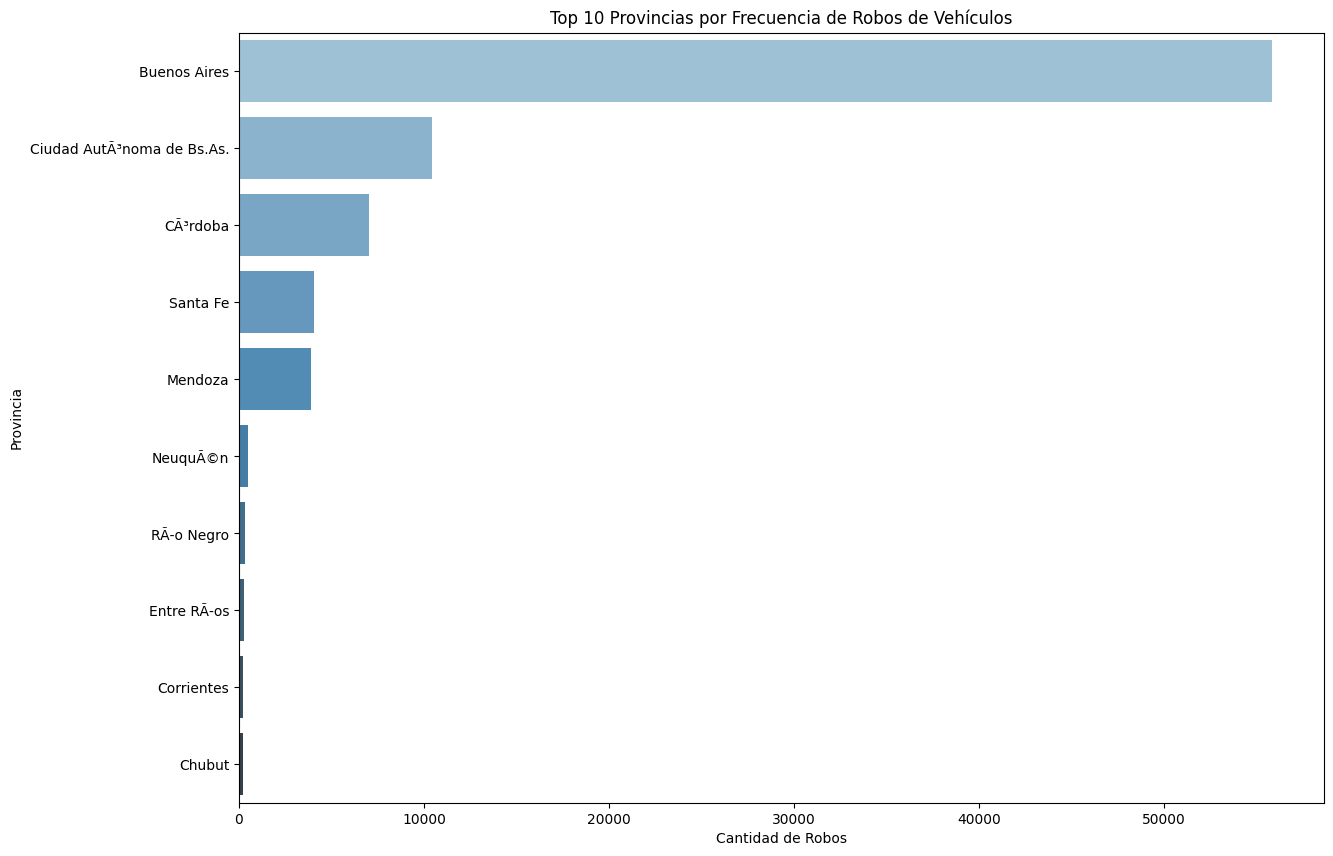

In [56]:
# Generando el gráfico de barras para las top 10 provincias con más robos
plt.figure(figsize=(14, 10))
provincia_counts = df_robos_autos['registro_seccional_provincia'].value_counts().head(10)  # Ajusta el nombre de la columna si es necesario
sns.barplot(x=provincia_counts.values, y=provincia_counts.index, palette="Blues_d")
plt.title('Top 10 Provincias por Frecuencia de Robos de Vehículos')
plt.xlabel('Cantidad de Robos')
plt.ylabel('Provincia')


# Guardando el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_barras_frec_robos_prov.png') 

# Mostrando el gráfico
plt.show()

El gráfico de barras siguiente destaca las 10 provincias con la mayor cantidad de robos de vehículos reportados. Se puede apreciar que Buenos Aires y Ciudad Autónoma de Buenos Aires se destacan por una alta frecuencia de incidentes.

## 3. Preprocesamiento de Datos ##

<Axes: >

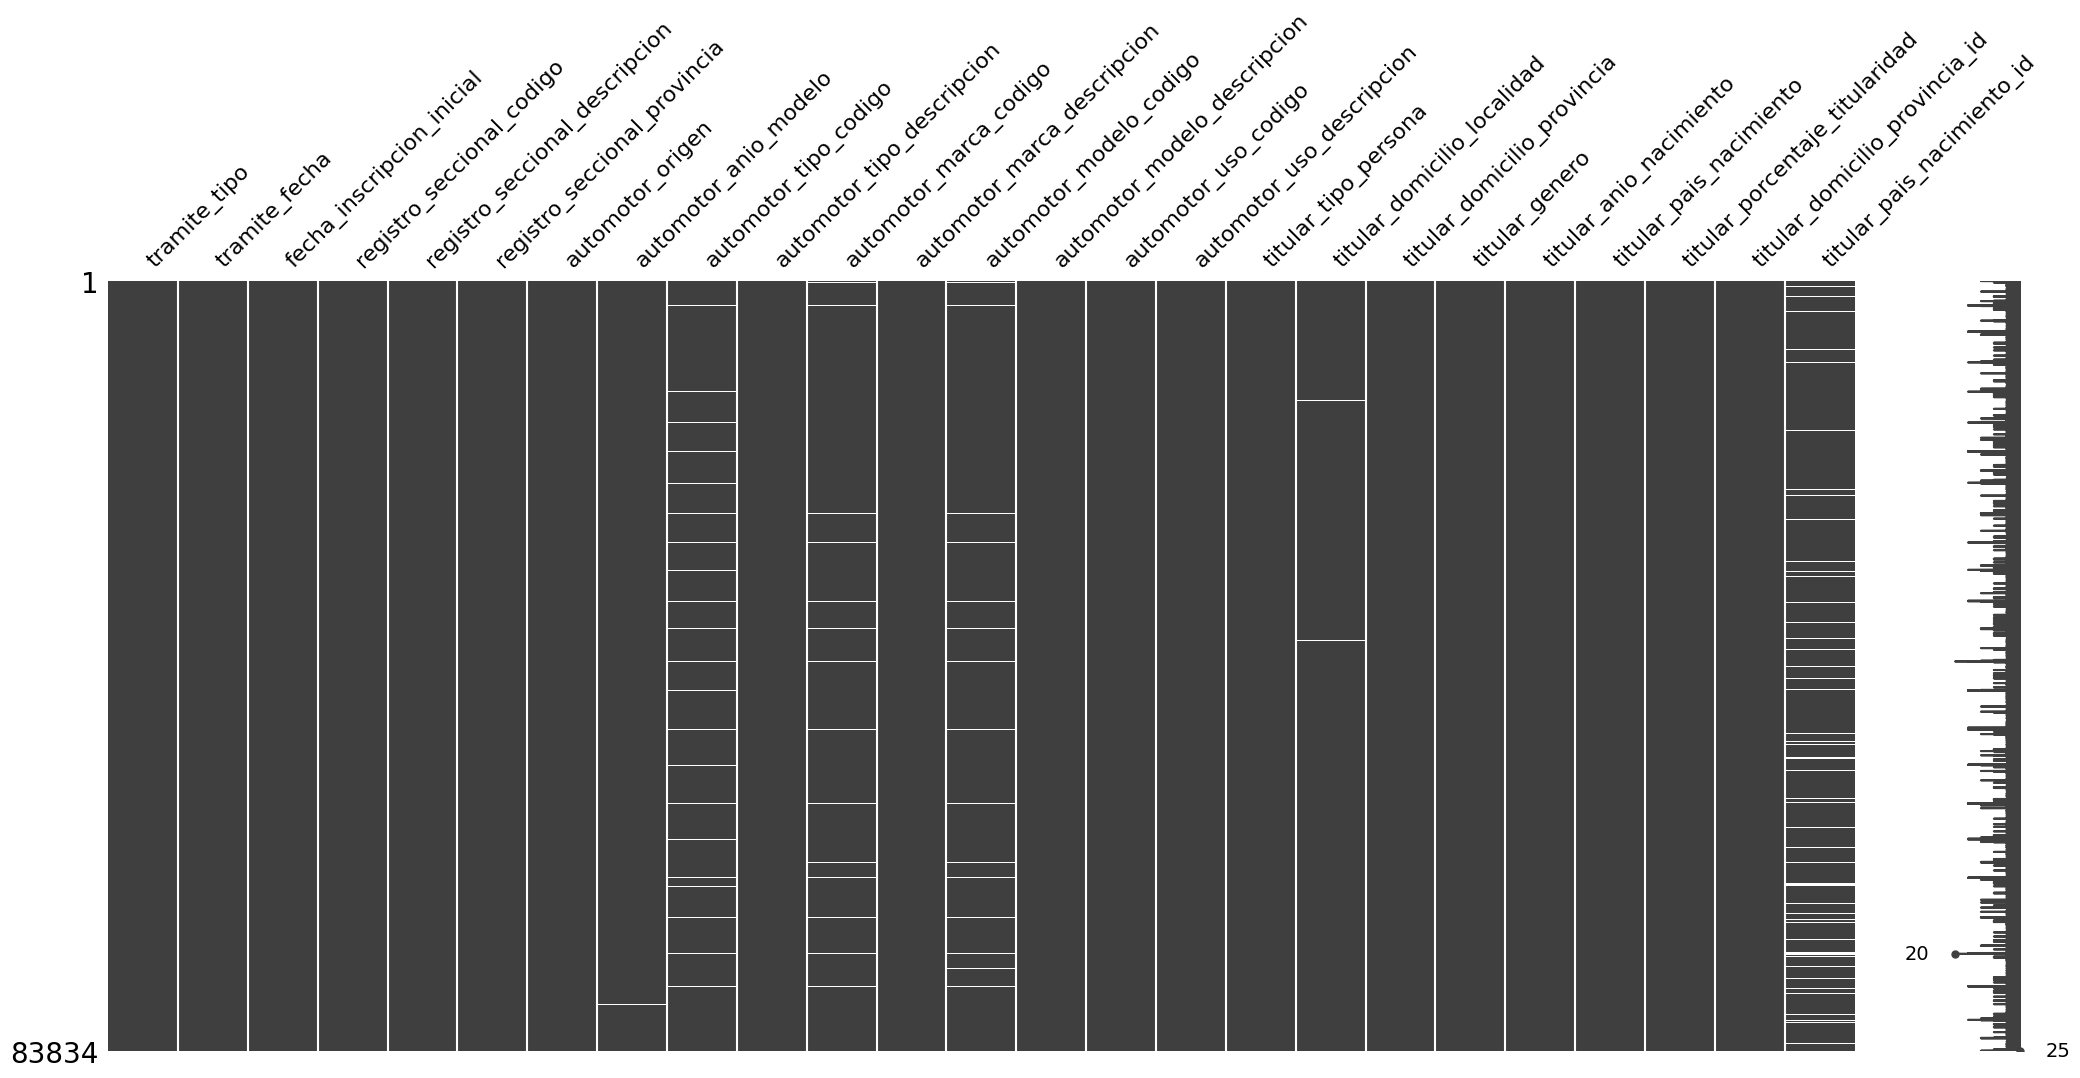

In [57]:
# Visualización de la matriz de datos faltantes
msno.matrix(df_robos_autos)

**3.1. Detección y limpieza de duplicados**

In [58]:
# Indentificamos registros duplicados
duplicados = df_robos_autos.duplicated().sum()
print(f'Registros duplicados:\n{duplicados}')

Registros duplicados:
0


No hay registros duplicados en este df.

**3.2. Detección y manejo de valores nulos**

In [59]:
# Contamos los valores nulos.
valores_nulos = df_robos_autos.isnull().sum()
print(f'Valores nulos por columna:\n{valores_nulos[valores_nulos > 0]}')

Valores nulos por columna:
fecha_inscripcion_inicial         1
automotor_anio_modelo           174
automotor_tipo_codigo          2399
automotor_marca_codigo         1032
automotor_modelo_codigo        1162
automotor_uso_codigo              3
automotor_uso_descripcion         3
titular_domicilio_localidad      85
titular_anio_nacimiento          14
titular_pais_nacimiento_id     4750
dtype: int64


La cantidad de datos nulos en estas columnas es relativamente pequeña en comparación con el tamaño del dataset. Por lo tanto, la eliminación de estos registros tiene un impacto mínimo en la cantidad de datos disponibles para el análisis.

In [60]:
# Eliminamos valores nulos de la columnas identificadas.
df_robos_autos = df_robos_autos.dropna(subset=['fecha_inscripcion_inicial', 'automotor_anio_modelo', 'automotor_tipo_codigo', 'automotor_marca_codigo', 'automotor_modelo_codigo', 'automotor_uso_codigo', 'automotor_uso_descripcion', 'titular_domicilio_localidad', 'titular_anio_nacimiento', 'titular_pais_nacimiento_id'])

In [61]:
# Verificamos la eliminación de valores nulos.
valores_nulos_post_limpieza = df_robos_autos.isnull().sum()
print(f'Valores nulos por columna post limpieza:\n{valores_nulos_post_limpieza[valores_nulos_post_limpieza >= 0]}')

Valores nulos por columna post limpieza:
tramite_tipo                      0
tramite_fecha                     0
fecha_inscripcion_inicial         0
registro_seccional_codigo         0
registro_seccional_descripcion    0
registro_seccional_provincia      0
automotor_origen                  0
automotor_anio_modelo             0
automotor_tipo_codigo             0
automotor_tipo_descripcion        0
automotor_marca_codigo            0
automotor_marca_descripcion       0
automotor_modelo_codigo           0
automotor_modelo_descripcion      0
automotor_uso_codigo              0
automotor_uso_descripcion         0
titular_tipo_persona              0
titular_domicilio_localidad       0
titular_domicilio_provincia       0
titular_genero                    0
titular_anio_nacimiento           0
titular_pais_nacimiento           0
titular_porcentaje_titularidad    0
titular_domicilio_provincia_id    0
titular_pais_nacimiento_id        0
dtype: int64


In [62]:
# Actualizamos el tamaño del dataset.
print(f'Tamaño del dataset después de eliminar los valores nulos en las columnas identificadas:\n{df_robos_autos.shape}')

Tamaño del dataset después de eliminar los valores nulos en las columnas identificadas:
(76386, 25)


**3.3. Análisis y transformación de tipos de datos**

In [63]:
# Revisamos los tipos de datos actuales.
print(f'Tipos de datos antes de la transformación:\n{df_robos_autos.dtypes}')

Tipos de datos antes de la transformación:
tramite_tipo                       object
tramite_fecha                      object
fecha_inscripcion_inicial          object
registro_seccional_codigo           int64
registro_seccional_descripcion     object
registro_seccional_provincia       object
automotor_origen                   object
automotor_anio_modelo             float64
automotor_tipo_codigo              object
automotor_tipo_descripcion         object
automotor_marca_codigo             object
automotor_marca_descripcion        object
automotor_modelo_codigo            object
automotor_modelo_descripcion       object
automotor_uso_codigo              float64
automotor_uso_descripcion          object
titular_tipo_persona               object
titular_domicilio_localidad        object
titular_domicilio_provincia        object
titular_genero                     object
titular_anio_nacimiento           float64
titular_pais_nacimiento            object
titular_porcentaje_titularidad   

Vamos a transformar los tipos de datos de las columnas 'automotor_anio_modelo', 'automotor_uso_codigo' y 'titular_anio_nacimiento' de float a int porque el año es ineherentemente un valor entero, ya que no puede haber una fracción de año en este contexto. 

También, vamos a transformar las columnas de 'fecha_inscripcion_inicial' y 'tramite_fecha' de object (string) a datetime.

Los tipos de datos correctos simplifican las operaciones y comparaciones.

In [64]:
# Transformamos el tipo de dato de las 'automotor_anio_modelo', 'automotor_uso_codigo' y 'titular_anio_nacimiento'.
df_robos_autos['automotor_anio_modelo'] = df_robos_autos['automotor_anio_modelo'].astype(int)
df_robos_autos['automotor_uso_codigo'] = df_robos_autos['automotor_uso_codigo'].astype(int)
df_robos_autos['titular_anio_nacimiento'] = df_robos_autos['titular_anio_nacimiento'].astype(int)


In [65]:
# Verificamos los tipos de dato luego de la transformación.
print('Tipos de datos después de la transformación:')
print(df_robos_autos.dtypes['automotor_anio_modelo'])
print(df_robos_autos.dtypes['automotor_uso_codigo'])
print(df_robos_autos.dtypes['titular_anio_nacimiento'])

Tipos de datos después de la transformación:
int32
int32
int32


In [66]:
# Tranformamos el tipo de dato de las columnas 'fecha_inscripcion_inicial' y 'tramite_fecha'.
df_robos_autos['fecha_inscripcion_inicial'] = pd.to_datetime(df_robos_autos['fecha_inscripcion_inicial'], errors='coerce')
df_robos_autos['tramite_fecha'] = pd.to_datetime(df_robos_autos['tramite_fecha'], errors='coerce')

In [67]:
# Verificamos los tipos de dato luego de la transformación
print('Tipos de datos después de la transformación:')
print(df_robos_autos.dtypes['fecha_inscripcion_inicial'])
print(df_robos_autos.dtypes['tramite_fecha'])

Tipos de datos después de la transformación:
datetime64[ns]
datetime64[ns]


**3.4. Borrado o transformación de columnas irrelevantes o redundantes**

Observando la estructura del dataset, identificamos columnas con información redundante tales como 'titular_domicilio_provincia_id' y 'titular_pais_nacimiento_id' y no aportan valor adicional, por lo que ya tenemos 'titular_domicilio_provincia' y 'titular_pais_nacimiento'. Por lo tanto, vamos a proceder a la elimación de las mismas.

In [68]:
# Eliminamos las columnas con información redundante 'titular_domicilio_provincia_id' y 'titular_pais_nacimiento_id'.
columnas_a_eliminar = ['titular_domicilio_provincia_id', 'titular_pais_nacimiento_id']
df_robos_autos = df_robos_autos.drop(columns=columnas_a_eliminar)

In [69]:
# Verificamos el dataset después de la eliminación, imprimiendo las primeras 5 líneas.
df_primeras_5_post = df_robos_autos.head()
print(df_primeras_5_post)

                                     tramite_tipo tramite_fecha  \
44  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-25   
45  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-27   
46  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-26   
47  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-07   
48  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-17   

   fecha_inscripcion_inicial  registro_seccional_codigo  \
44                2000-02-02                       2043   
45                2009-12-28                       2043   
46                1999-10-15                       1183   
47                2000-01-28                       1185   
48                2008-02-08                       1146   

   registro_seccional_descripcion registro_seccional_provincia  \
44        CAPITAL FEDERAL NÂº 043   Ciudad AutÃ³noma de Bs.As.   
45        CAPITAL FEDERAL NÂº 043   Ciudad AutÃ³noma de Bs.As.   
46                  OLIVOS NÂº 06           

In [70]:
# Mostrando los valores únicos para identificar variantes en las descripciones de 'automotor_tipo_descripcion'.
tipos_de_autos_unicos = df_robos_autos['automotor_tipo_descripcion'].unique()
sorted(tipos_de_autos_unicos)

['12',
 '12 - SEDAN 4 PUERTAS',
 '17 - SEDAN 5 PUERTAS',
 '2 PUERTAS',
 '3 PUERTAS',
 '348 - FOX 1.6',
 '5 PTAS',
 '5 PUERTAS',
 'ACOPLADO',
 'AMBULANCIA',
 'ARENERO',
 'AUTOMOVIL',
 'AUTOMOVIL 4 PTAS',
 'BERLINA',
 'BERLINA  5 PUERTAS',
 'BERLINA 3 PT AA',
 'BERLINA 3 PTAS',
 'BERLINA 3 PTAS.',
 'BERLINA 3 PUERTAS',
 'BERLINA 3 PUERTAS AA',
 'BERLINA 3PTAS',
 'BERLINA 4 PUERTAS',
 'BERLINA 5 PTAS',
 'BERLINA 5 PTAS.',
 'BERLINA 5 PUERTAS',
 'BREACK 4 PUERTAS',
 'BREAK',
 'BREAK 4 PUERTAS',
 'BREAK 4/5 PTAS',
 'C/ CAB. CON PORT. VOLQUETE',
 'CABINA SIMPLE C/ CAJA VOL',
 'CAJA  MUDANCERA',
 'CAJA ABIERTA MUDANCERA',
 'CAJA CERRADA ISOTERMICA C/F',
 'CAJA PLAYA C/HIDROGRUA',
 'CAM BALANCIN C/CAJA TERM',
 'CAMION',
 'CAMION C/ HIDROGRUA',
 'CAMION C/CABINA DORMITORIO',
 'CAMION C/CAJA CARGAS GRALES',
 'CAMION C/CAJA TERM.Y EQ.FRIO',
 'CAMION C/CAJA VOLCADORA',
 'CAMION C/CJA TERM. Y EQ.FRIO',
 'CAMION C/EQ PORTA ROLL OFF',
 'CAMION C/HIDROGRUA Y CAJA P.',
 'CAMION C/PLANCHA P/REMOLQUE',
 

In [71]:
# Definiendo una función para estandarizar las descripciones de la columna 'automotor_tipo_descripcion'.
def estandarizacion_tipo_auto(descripcion):
    if pd.isnull(descripcion):
        return descripcion # Mantiene las descripciones nulas.
    
    # Convierte a cadenas de texto en mayúsculas todas las descripciones.
    descripcion = str(descripcion).upper() 
    
    # Reglas para unificar las descripciones bajo categorias específicas
    if any(termino in descripcion for termino in ['3 PTAS', '3 PUERTAS', '3PTAS', 'TRES PUERTAS', 'DESCAPOTABLE', 'COUPE']):
        return '3 PUERTAS'
    elif any(termino in descripcion for termino in ['SEDAN', 'BERLINA', '4 PTAS', '4 PUERTAS', '4PTAS', 'CUATRO PUERTAS']):
        return '4 PUERTAS'
    elif any(termino in descripcion for termino in ['HATCHBACK', 'ST WAGON', 'STATION WAGON', 'UTILITARIO 4X4 5 PUERTAS', 'R 5 PUERTAS', 'RURAL', '5 PTAS', '5 PUERTAS', '5PTAS', 'CINCO PUERTAS']):
        return '5 PUERTAS'
    elif any(termino in descripcion for termino in ['FURGON', 'FOURGON', 'FURGONETA', 'UTILITARIO', 'UTILITARO', 'FURGONTERMICOC/EQUIPFRIO', 'FURG', 'CAJA MUDANCERA' ]):
        return 'FURGON'
    elif any(termino in descripcion for termino in ['PICK', 'CAMIONETA']):
        return 'PICK-UP'
    elif any(termino in descripcion for termino in ['MINIBUS', 'MIDIBUS', 'MICROOMNIBUS']):
        return 'MINIBUS'
    elif any(termino in descripcion for termino in ['T TERRENO', 'TT', 'TODO TERRENO', 'JEEP', 'ARENERO']):
        return 'TODO TERRENO'
    elif any(termino in descripcion for termino in [
        'TRAN. DE CARGA', 'TRANS. DE PASAJEROS', 'TRANS.DE PASAJEROS', 'TRANSP. DE PASAJEROS',
        'TRANSP.DE PASAJEROS', 'TRANSPORTE DE AUTOMOTORES', 'TRANSPORTE DE CARGA', 
        'TRANSPORTE DE PASAJEROS', 'TRANSPORTE ESCOLAR', 'VAN', 'VAN FAMILIAR', 
        'VIDRIADA C/ASIENTOS', 'COMBI', 'FAMILIAR']):
        return 'VAN'
    elif any(termino in descripcion for termino in [
        'CAMION', 'CHASIS', 'CHASIS C/CABINA', 'CAM BALANCIN C/CAJA TERM', 'SEMIRREMOLQUE']):
        return 'CAMION'
    
    else:
        return 'OTRO TIPO'

In [72]:
# Aplicación la estandarización
df_robos_autos['automotor_tipo_descripcion'] = df_robos_autos['automotor_tipo_descripcion'].apply(estandarizacion_tipo_auto)

In [73]:
# Verificación los cambios realizados
df_robos_autos['automotor_tipo_descripcion'].value_counts().head(30)

automotor_tipo_descripcion
4 PUERTAS       49307
3 PUERTAS        8776
PICK-UP          6424
5 PUERTAS        4663
FURGON           4490
TODO TERRENO     1357
VAN               527
CAMION            511
OTRO TIPO         257
MINIBUS            74
Name: count, dtype: int64

In [74]:
# Mostrando los valores únicos para identificar variantes en las descripciones de 'automotor_marca_descripcion'.
marca_descripcion_unicos = df_robos_autos['automotor_marca_descripcion'].unique()
sorted(marca_descripcion_unicos)

['-024- CHEVROLET',
 '-024-CHEVROLET',
 '-044- FIAT',
 '-044-FIAT',
 '-047- FORD',
 '-047-FORD',
 '-058-HYUNDAI',
 '-112- RENAULT',
 '-112-RENAULT',
 '-136-VOLKSWAGEN',
 '-VOLKSWAGEN',
 '.CHEVROLET',
 '3-STAR',
 '37 - RENAULT',
 'AGRALE',
 'ALFA ROMEO',
 'ASIA',
 'AST-PRA',
 'ASTIVIA',
 'AUDI',
 'B.M.W.',
 'BAIC',
 'BMW',
 'BONANO',
 'C.M.',
 'CHERY',
 'CHEVROELT',
 'CHEVROLET',
 'CHEVROLET (024)',
 'CHRYSLER',
 'CITROEN',
 'CITROÃ\x8bN',
 'COQUITO',
 'CORMETAL',
 'DACIA',
 'DAEWO',
 'DAEWOO',
 'DAIHATSU',
 'DEPAOLI',
 'DEUTZ AGRALE',
 'DEUTZ-AGRALE',
 'DFM',
 'DFSK',
 'DODGE',
 'DS',
 'FIAT',
 'FIAT IVECO',
 'FIAT.',
 'FORD',
 'FOTON',
 'FREIGHTLINER',
 'G.M.C. CHEVETTE',
 'GALLOPER',
 'GAMMA',
 'GAZ',
 'GEELY',
 'GENERAL MOTORS ARGENTINA S. R.  L.',
 'GMC CHEVETTE',
 'GOLONDRINA',
 'GOMATRO',
 'GRASSANI',
 'GUERRA',
 'HAVAL',
 'HELVETICA',
 'HERMANN',
 'HONDA',
 'HYUNDAI',
 'IDEROL',
 'INDUSTRIAS AHT ALZUARTE',
 'INDUTEK',
 'INFINITI',
 'ISUZU',
 'IVECO',
 'JAC',
 'JEEP',
 'KIA',
 'L

In [75]:
# Definiendo una función para estandarizar las descripciones de la columna 'automotor_marca_descripcion'.
def estandarizacion_marca_auto(descripcion):
    if pd.isnull(descripcion):
        return descripcion # Mantiene las descripciones nulas.
    
    # Covierte a cadenas de texto en mayúsculas todas las descripciones y elimina espacios extra.
    descripcion = str(descripcion).upper().strip()
    
    # Elimina prefijos/sufijos numéricos y caracteres especiales.
    descripcion = re.sub(r'^[-.0-9\s]+', '', descripcion)
    
    # Elimina espacios múltiples.
    descripcion = re.sub(r'[\s]+', ' ', descripcion)
    
    # Correcciones específicas para errores comunes y unificación de variantes.
    correcciones = {       
    'CHEVROELT': 'CHEVROLET',
        'CHEVROLET (024)': 'CHEVROLET',
        'B.M.W.': 'BMW',
        'VLOKSWAGEN': 'VOLKSWAGEN',
        'VOKSWAGEN': 'VOLKSWAGEN',
        'VOLKSWAGEN/MARCOPOLO': 'VOLKSWAGEN',
        'VOLKSWAGENVOLKSWAGEN': 'VOLKSWAGEN',
        'VOLKSWAGUEN': 'VOLKSWAGEN',
        'VOLKSWGEN': 'VOLKSWAGEN',
        'VOLKSWWAGEN': 'VOLKSWAGEN',
        'VOLKWAGEN': 'VOLKSWAGEN',
        'VOLSKWAGEN': 'VOLKSWAGEN',
        'VOLSWAGEN': 'VOLKSWAGEN',
        'WOLKSWAGEN': 'VOLKSWAGEN',
        'CITROÃ\x8bN': 'CITROEN',
        'DAEWO': 'DAEWOO',
        'MERCEDES BENZ': 'MERCEDES-BENZ',
        'MERCEDES BENZ.': 'MERCEDES-BENZ',
        'MERCEDES BENZ/COMIL': 'MERCEDES-BENZ',
        'M. BENZ': 'MERCEDEZ-BENZ',
        'OEUGEOT': 'PEUGEOT',
        'PEOGEOT': 'PEUGEOT',
        'PEUGEOT (039)': 'PEUGEOT',
        'PEUIGEOT': 'PEUGEOT',
        'PICASSO': 'CITROEN',
        'PUEGEOT': 'PEUGEOT',
        'REANULT': 'RENAULT',
        'RENAUL': 'RENAULT',
        'RENAUTL': 'RENAULT',
        'G.M.C. CHEVETTE': 'CHEVROLET',
        'GMC CHEVETTE': 'CHEVROLET',
        'GENERAL MOTORS ARGENTINA S. R.  L.': 'CHEVROLET',
        'SIN MARCA': 'DESCONOCIDO',
        'SIN IDENTIFICACION': 'DESCONOCIDO',
        'SIN ESPECIFICACION': 'DESCONOCIDO',
        'SANGYONG': 'SSANGYONG',
        'SUZUKI VITARA': 'SUZUKI',
        'SUZUKI SWIFT SEDAN NLX':'SUZUKI',
        'FIAT IVECO': 'IVECO',
        'FIAT.': 'FIAT',
        'DEUTZ AGRALE': 'DEUTZ-AGRALE',
        'ROVER':'LAND ROVER',
        
    }
    
    for error, correccion in correcciones.items():
        if error in descripcion:
            return correccion
        
    return descripcion

In [76]:
# Aplicación de la estandarización.
df_robos_autos['automotor_marca_descripcion'] = df_robos_autos['automotor_marca_descripcion'].apply(estandarizacion_marca_auto)

In [77]:
# Verificación los cambios realizados
df_robos_autos['automotor_marca_descripcion'].value_counts().head(150)

automotor_marca_descripcion
VOLKSWAGEN    16203
CHEVROLET     10659
FIAT          10621
RENAULT       10244
FORD           8616
              ...  
LADA              1
C.M.              1
STAHL             1
HELVETICA         1
COQUITO           1
Name: count, Length: 109, dtype: int64

**3.5. Encoding de variables categóricas e Ingeniería de atributos**

In [78]:
# Cálculo de la antigüedad del vehículo en años al momento del robo
df_robos_autos['antiguedad_vehiculo'] = (df_robos_autos['tramite_fecha'] - df_robos_autos['fecha_inscripcion_inicial']).dt.days / 365

In [79]:
# Filtrado de datos para asegurar años de modelo razonables
df_robos_autos = df_robos_autos[(df_robos_autos['automotor_anio_modelo'] >= 1980) & (df_robos_autos['automotor_anio_modelo'] <= 2023)]

**3.6. Creación de Nuevas Variables**

In [80]:
# Creación de nuevas variables sintéticas
df_robos_autos['modelo_provincia'] = df_robos_autos['registro_seccional_provincia'] + '_' + df_robos_autos['automotor_modelo_descripcion']
año_actual = pd.to_datetime('today').year
df_robos_autos['edad_titular'] = año_actual - pd.to_numeric(df_robos_autos['titular_anio_nacimiento'], errors='coerce')
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
df_robos_autos['categoria_edad_titular'] = pd.cut(df_robos_autos['edad_titular'], bins=bins, labels=labels, right=False)
df_robos_autos['uso_origen'] = df_robos_autos['automotor_uso_descripcion'] + '_' + df_robos_autos['automotor_origen']

<Axes: >

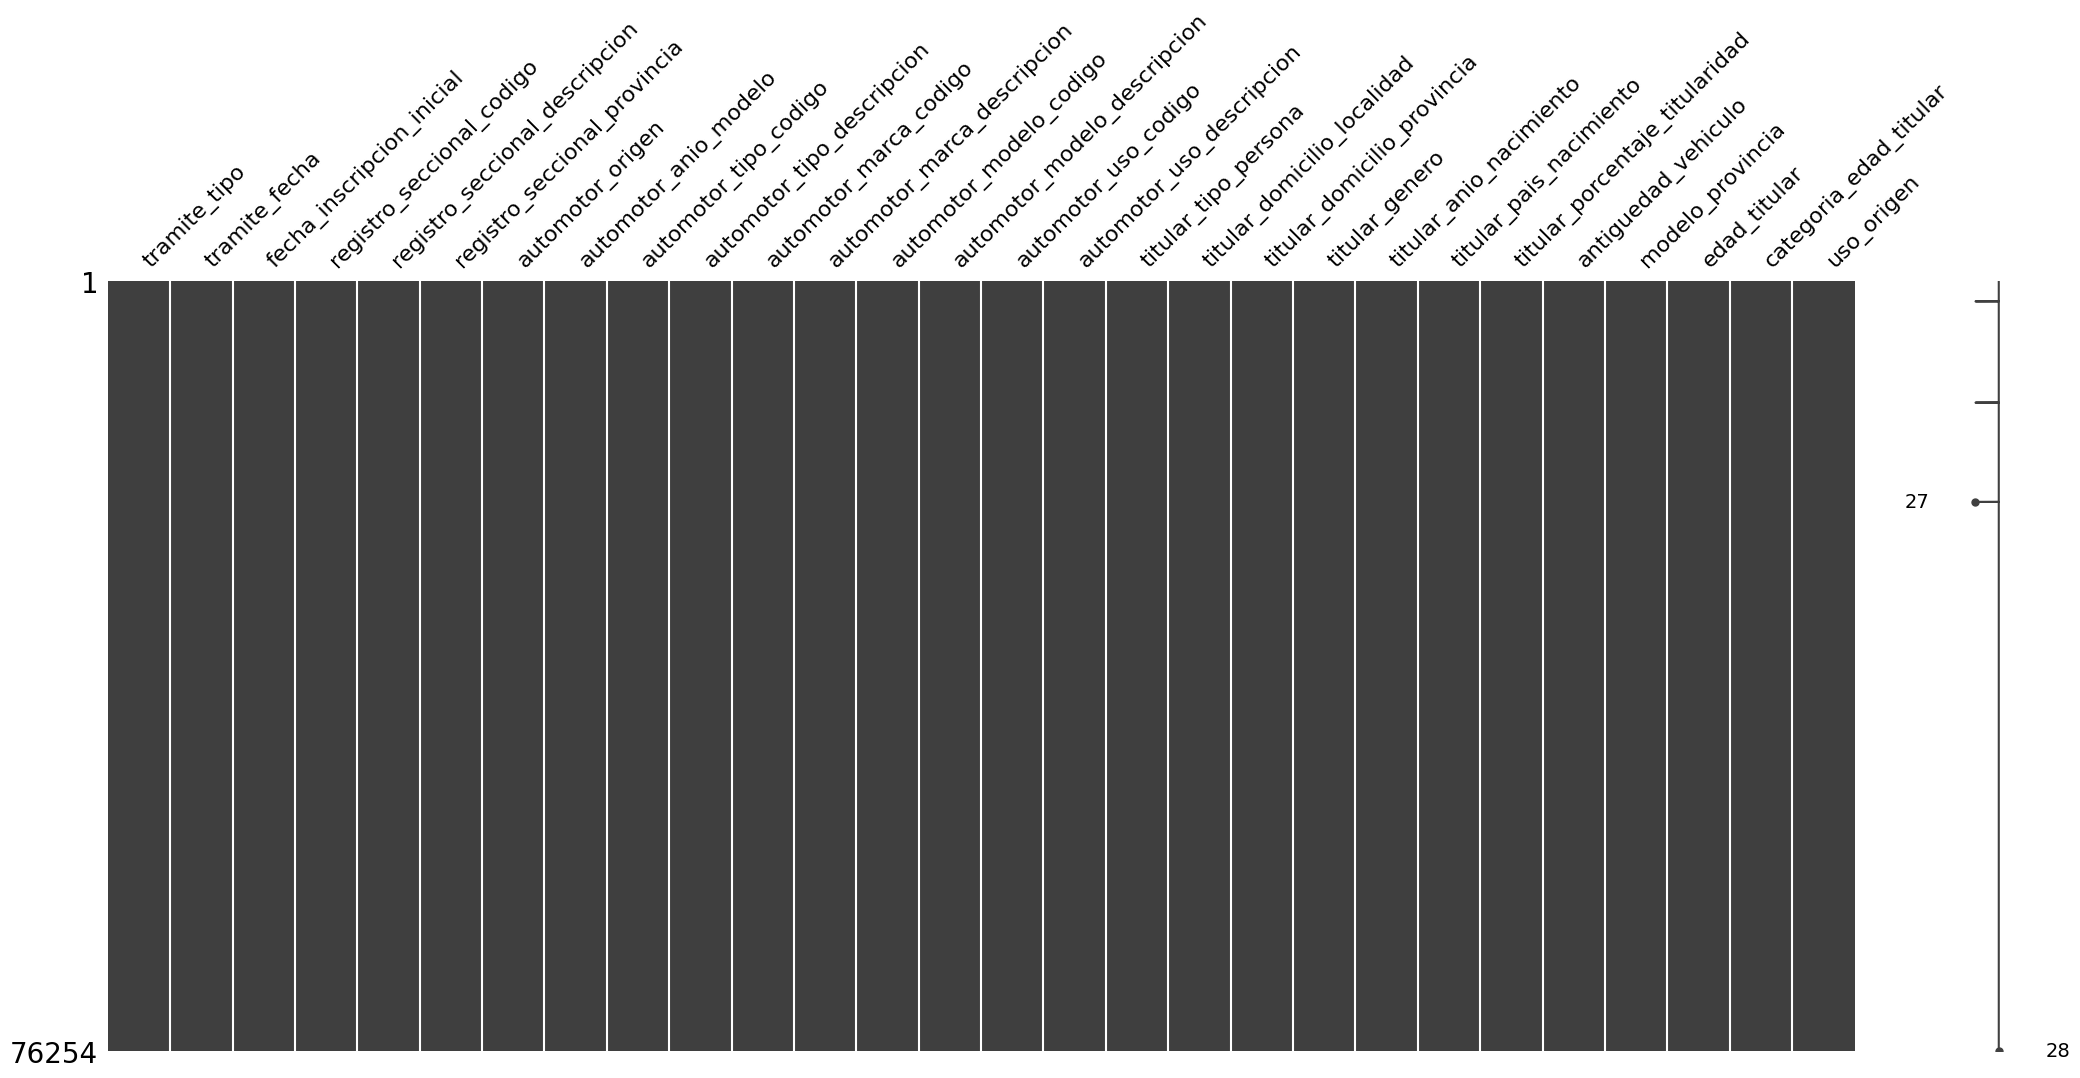

In [81]:
# Visualización de la matriz de datos faltantes post data wrangling
msno.matrix(df_robos_autos)

## 4. Exploración de Datos (EDA) y Análisis Descriptivo ##

**4.1. Análisis Exploratorio de Datos y Visualizaciones relevantes**

4.1.1. Gráfico Univariado: Gráfico de línea de la tendencia de robos por mes durante los años 2022 y 2023

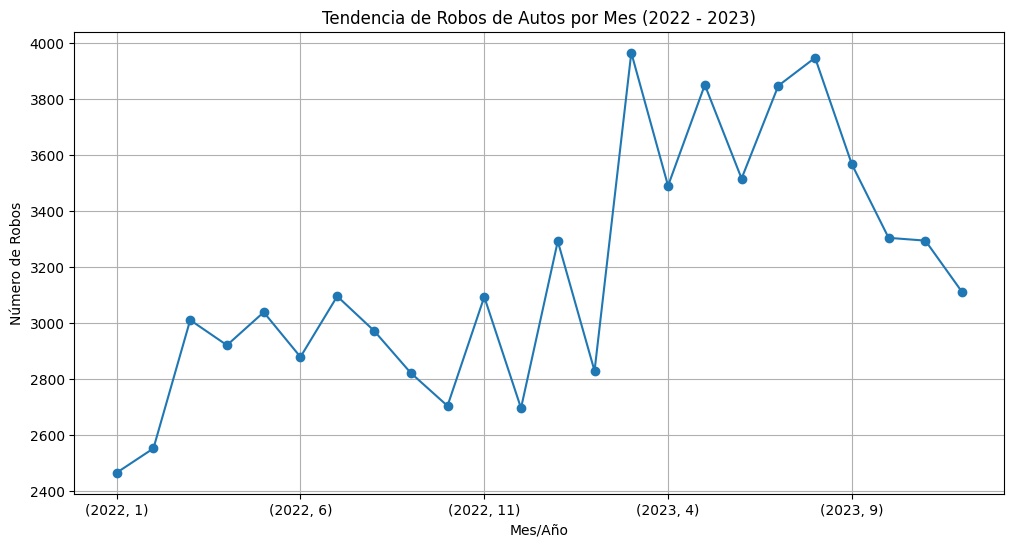

In [82]:
# Agrupar los robos por año y mes
robos_por_mes = df_robos_autos.groupby([df_robos_autos['tramite_fecha'].dt.year, df_robos_autos['tramite_fecha'].dt.month]).size()

# Visualización
plt.figure(figsize=(12, 6))
robos_por_mes.plot(kind='line', marker='o')
plt.title('Tendencia de Robos de Autos por Mes (2022 - 2023)')
plt.xlabel('Mes/Año')
plt.ylabel('Número de Robos')
plt.grid(True)

# Guardando el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_tendecia_robos_22_23.png')

# Mostrando el gráfico
plt.show()


Este gráfico de línea muestra la tendencia de robos de autos mes a mes durante los años 2022 y 2023 en Argentina, revelando fluctuaciones significativas en el número de incidentes a lo largo del tiempo. Esta variabilidad es un indicador claro de que los robos de autos no se distribuyen uniformemente a lo largo del año, sino que parecen estar influenciados por factores temporales específicos. Aunque el gráfico no muestra los números exactos mes a mes, las tendencias pueden apuntar a periodos del año en los que aumenta la vulnerabilidad de los vehículos al robo, posiblemente debido a vacaciones, eventos festivos, o cambios en el comportamiento social y económico.

Analizando más detenidamente, se puede inferir que:

- Periodos de Aumento: Si se identifican meses consecutivos con un aumento en el número de robos, esto podría indicar una temporada particularmente riesgosa para los propietarios de autos. Este patrón podría estar relacionado con factores como vacaciones largas, cuando los autos pueden quedar más tiempo estacionados en la vía pública, aumentando su susceptibilidad al robo.

- Disminuciones Notables: Por otro lado, los periodos en los que se observa una disminución en los robos pueden coincidir con momentos de mayor vigilancia policial o iniciativas de seguridad pública efectivas. También podría reflejar periodos de menor actividad social, donde hay menos oportunidades para los ladrones de actuar.

- Comparación Anual: Al observar los datos de dos años consecutivos, se puede intentar identificar tendencias a largo plazo, como una disminución o aumento general en los robos, lo que podría reflejar el impacto de políticas de seguridad implementadas o cambios en las tácticas de los ladrones.

4.1.2. Gráfico Bivariado: Gráfico de Barras horizontal del ranking de marcas más robadas

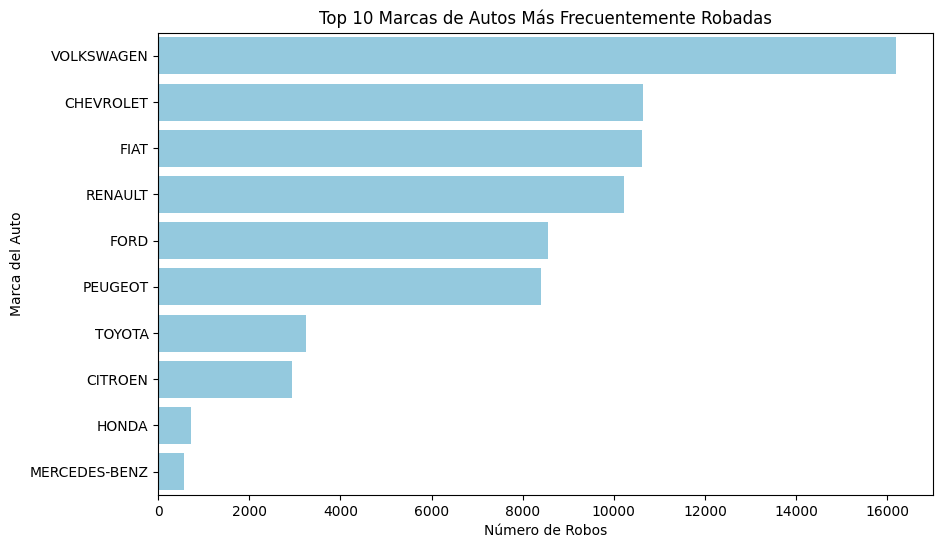

In [83]:
# Realizar el conteo de las marcas más robadas
top_10_marcas_robadas = df_robos_autos['automotor_marca_descripcion'].value_counts().head(10)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_marcas_robadas.values, y=top_10_marcas_robadas.index, color='skyblue')
plt.title('Top 10 Marcas de Autos Más Frecuentemente Robadas')
plt.xlabel('Número de Robos')
plt.ylabel('Marca del Auto')


# Guardando el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_ranking_marcas.png')

# Mostrando el gráfico
plt.show()



Este gráfico de barras muestra las diez marcas de automóviles que fueron robadas con mayor frecuencia, destacando las diferencias en la incidencia de robos entre diversas marcas. La interpretación de este gráfico ofrece varios insights sobre el fenómeno del robo de autos, que incluyen aspectos de demanda, seguridad y preferencias de los ladrones, entre otros.

- Preferencia por Ciertas Marcas: La presencia de marcas específicas en este top 10 sugiere que los ladrones podrían tener preferencias claras, posiblemente influenciadas por la popularidad de la marca, el valor de reventa de los autos, la demanda de repuestos en el mercado negro, o la facilidad de robo debido a vulnerabilidades en las medidas de seguridad de ciertos modelos.

- Popularidad y Disponibilidad: Las marcas más robadas son también, en muchos casos, algunas de las más comunes y vendidas en el mercado. Esto indica que la abundancia de ciertos vehículos en las calles puede aumentar la probabilidad de que sean robados, simplemente porque hay más disponibles para ser objetivo de los delincuentes.

- Valor de Reventa y Repuestos: Algunas marcas pueden ser más propensas al robo debido al alto valor de reventa de sus vehículos o la alta demanda de sus repuestos en el mercado negro. Esto puede hacerlos particularmente atractivos para los ladrones, quienes buscan el máximo beneficio de sus actividades ilegales.

- Seguridad y Tecnología: La presencia de ciertas marcas en la lista puede reflejar las vulnerabilidades en las tecnologías de seguridad de esos vehículos. Las marcas con sistemas de seguridad menos avanzados o con vulnerabilidades conocidas pueden ser objetivos más fáciles para los ladrones.

- Implicaciones para Propietarios y Aseguradoras: Saber cuáles marcas son más susceptibles al robo puede influir en las decisiones de compra de los consumidores, así como en las políticas de las compañías de seguros. Las marcas más robadas pueden enfrentar primas de seguro más altas debido al mayor riesgo asociado con ellas.

4.1.3. Gráfico Bivariado: Gráfico de Barras horizontal del ranking de los tipos de automotores más robados

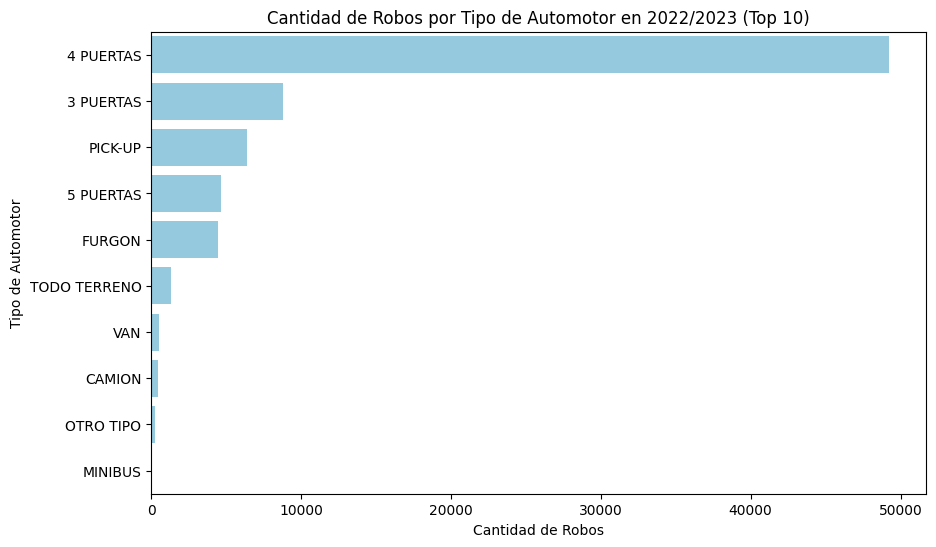

In [84]:
# Obtener los 10 tipos de automotores más robados
top_10_automotores = df_robos_autos['automotor_tipo_descripcion'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los 10 tipos más robados
df_top_10_automotores = df_robos_autos[df_robos_autos['automotor_tipo_descripcion'].isin(top_10_automotores)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10_automotores, y='automotor_tipo_descripcion', order=top_10_automotores, color='skyblue')
plt.title('Cantidad de Robos por Tipo de Automotor en 2022/2023 (Top 10)')
plt.xlabel('Cantidad de Robos')
plt.ylabel('Tipo de Automotor')

# Guardando el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_tipos_autos_robados.png')

# Mostrando el gráfico
plt.show()


Este gráfico de barras destaca los diez tipos de automotores más frecuentemente robados durante los años 2022 y 2023, ofreciendo una visión clara de las preferencias o tendencias en los robos de vehículos en Argentina. La clasificación se basa en el tipo de automotor, proporcionando una perspectiva detallada sobre qué categorías de vehículos son más susceptibles a ser robadas. La interpretación de este gráfico nos permite extraer varias conclusiones y perspectivas:

- Preferencias Específicas: La presencia dominante de ciertos tipos de automotores en esta lista sugiere que los ladrones tienen preferencias específicas, posiblemente influenciadas por la facilidad de robo, la demanda de estos vehículos en el mercado negro, o el valor de reventa de los vehículos y sus piezas.

- Vulnerabilidad por Tipo de Vehículo: Algunos tipos de automotores pueden ser inherentemente más vulnerables al robo, ya sea debido a deficiencias en sus sistemas de seguridad, la popularidad entre los consumidores que aumenta su número en las calles, o la facilidad con la que pueden ser revendidos o desmantelados.

- Implicaciones para la Seguridad y Prevención: Conocer los tipos de vehículos más robados puede guiar a fabricantes, propietarios, y autoridades en la implementación de medidas de seguridad más efectivas. Por ejemplo, podría justificar la inversión en tecnologías antirrobo avanzadas para los tipos de vehículos más afectados o incentivar a los propietarios de estos vehículos a tomar precauciones adicionales.

- Impacto en las Políticas de Seguros: Las compañías de seguros pueden utilizar esta información para ajustar las primas de seguro de acuerdo con el riesgo asociado a cada tipo de automotor. Los vehículos con mayor riesgo de robo pueden enfrentar primas más altas, reflejando el mayor costo potencial para la aseguradora.

- Decisiones de Compra: Los consumidores que estén considerando la compra de un nuevo vehículo pueden tomar en cuenta esta información para evaluar el riesgo de robo asociado con diferentes tipos de automotores. Esto podría influir en su decisión final, optando por vehículos con menor riesgo de robo o mejorando las medidas de seguridad post-compra.

4.1.4. Gráfico Multivariado: Mapa de calor de robos por mes y provincia

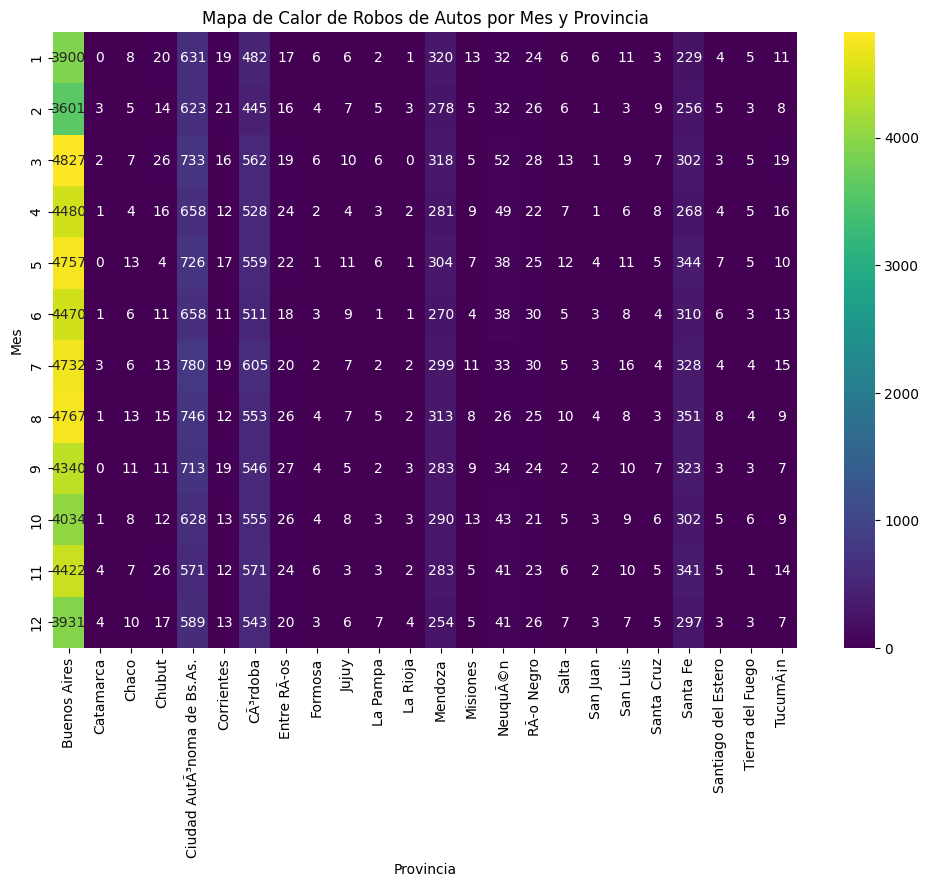

In [85]:
df_robos_autos['Mes'] = pd.to_datetime(df_robos_autos['tramite_fecha'], errors='coerce').dt.month
pivot_table = df_robos_autos.pivot_table(index='Mes', 
                                        columns='registro_seccional_provincia', 
                                        values='tramite_tipo',  # O cualquier columna para contar los robos
                                        aggfunc='count').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='viridis')
plt.title('Mapa de Calor de Robos de Autos por Mes y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mes')

# Guardando el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_heatmap_robos_mes_provincia.png')

# Mostrando el gráfico
plt.show()


El mapa de calor brinda una visión comprensiva de la distribución temporal y regional de los robos de automóviles. Las áreas más "calientes" (colores más intensos) indican una mayor frecuencia de robos. Esta visualización es especialmente útil para identificar patrones estacionales o mensuales en los robos de autos, así como para destacar si ciertas provincias tienen picos específicos en determinados momentos del año. Por ejemplo, un aumento de robos durante los meses de verano podría asociarse con un mayor número de vehículos en las calles o con una menor vigilancia durante las vacaciones. Estos insights son fundamentales para implementar medidas de seguridad enfocadas en períodos y lugares específicos.

En este caso, los resultados muestran que Buenos Aires lidera con un rango de robos entre 3800 y 5100, seguido por la Ciudad Autónoma de Buenos Aires (CABA) con 3760 a 1000, Córdoba entre 580 y 660, Mendoza entre 280 y 350, y Santa Fe entre 290 y 390. La interpretación sería:

- Buenos Aires: Con la mayor cantidad de robos registrados, estos números reflejan la densidad poblacional y la cantidad de vehículos en esta provincia. La alta incidencia podría estar relacionada con factores urbanos como el tráfico intenso, la presencia de zonas con menor vigilancia y una amplia red de rutas que facilitan el robo y la huida.

- Ciudad Autónoma de Buenos Aires (CABA): Aunque menor en comparación con la provincia de Buenos Aires, la tasa de robos en CABA sigue siendo significativa. Esto puede deberse a la alta concentración de actividades comerciales y residenciales, junto con la abundancia de vehículos.

- Córdoba, Mendoza y Santa Fe: Estas provincias, aunque con tasas más bajas que Buenos Aires y CABA, aún presentan cifras significativas de robos. Esto puede reflejar centros urbanos activos y áreas de alta circulación vehicular dentro de estas provincias.

- Variaciones Mensuales: 

A. Aumento de Robos entre Marzo y Noviembre:

Esta tendencia podría estar influenciada por varios factores socioeconómicos y estacionales. Por ejemplo, podría haber un aumento en la actividad económica y el movimiento de personas y vehículos durante estos meses, lo que ofrece más oportunidades para el robo de autos.
El ciclo académico en universidades y escuelas, que generalmente transcurre en estos meses, podría contribuir a un mayor tráfico vehicular en áreas urbanas, aumentando así las oportunidades de robo.
Eventos específicos, como festivales, ferias o eventos deportivos que suelen ocurrir en estos meses, también podrían influir en el aumento de los robos de autos.

B. Disminución de Robos en Enero, Febrero y Diciembre:

La disminución de robos durante estos meses podría relacionarse con las vacaciones de verano y las festividades de fin de año, donde muchas personas podrían dejar las ciudades, reduciendo así la cantidad de vehículos disponibles para robar en áreas urbanas.
También es posible que durante las vacaciones de verano y las festividades de diciembre, haya un incremento en las medidas de seguridad y vigilancia, lo que podría disuadir a los potenciales ladrones.
La disminución en enero y febrero podría ser una indicación de que los propietarios de vehículos son más cautelosos o utilizan menos sus vehículos durante estos meses.


**4.2. Recomendaciones Basadas en Insights Observados**

4.2.1. Estrategias de Seguridad para Modelos de Autos Más Robados:

- Focalización en Modelos Específicos: Dado que algunos modelos de autos son más propensos a ser robados, las autoridades y las compañías de seguridad podrían desarrollar estrategias de seguridad específicas para estos modelos. Esto incluye aumentar la vigilancia en áreas donde estos modelos son populares y promover la instalación de sistemas antirrobo avanzados en estos vehículos.
- Campañas de Concientización: Informar a los propietarios de los modelos de autos más robados sobre los riesgos y medidas preventivas a través de campañas de concientización. Esto podría incluir recomendaciones sobre estacionamiento seguro, uso de dispositivos de seguridad y la importancia del seguimiento de vehículos.


4.2.2. Incremento de Vigilancia en Provincias con Mayores Tasas de Robo:

- Despliegue de Recursos: Las fuerzas de seguridad podrían desplegar más recursos en provincias con altas tasas de robos de autos. Esto podría incluir más patrullas en áreas clave, puntos de control y el uso de tecnología de vigilancia como cámaras de seguridad.
- Colaboración con Autoridades Locales: Trabajar en conjunto con gobiernos locales para implementar programas de prevención del delito y mejorar la iluminación y seguridad en áreas con alta incidencia de robos.


4.2.3. Ajuste de Estrategias de Prevención y Respuesta según la Temporalidad:

- Enfoque en Meses de Mayor Incidencia: Analizar los patrones temporales para identificar los meses con mayor incidencia de robos y ajustar las estrategias de seguridad y vigilancia durante estos períodos.
- Planificación de Recursos Según la Demanda: Asegurarse de que haya suficientes recursos disponibles durante los meses de mayor actividad delictiva y considerar estrategias como el aumento temporal del personal de seguridad o la colaboración interdepartamental.


4.2.4. Cooperación con Compañías de Seguros:

- Datos para Políticas de Seguros: Compartir los insights del análisis de datos con compañías de seguros para que puedan ajustar sus políticas y primas de acuerdo con los riesgos asociados a ciertos modelos de autos y áreas geográficas.
- Programas Conjuntos de Prevención del Delito: Desarrollar programas conjuntos entre las autoridades y las compañías de seguros para promover medidas de seguridad en los vehículos y reducir la incidencia de robos.

## 5. Metodología ##

**5.1. División entre conjunto de entrenamiento y prueba**

In [86]:
# Preparación de datos para el modelado
le = LabelEncoder()
caracteristicas_categoricas = ['modelo_provincia', 'categoria_edad_titular', 'uso_origen']
for caracteristica in caracteristicas_categoricas:
    df_robos_autos[caracteristica] = le.fit_transform(df_robos_autos[caracteristica].astype(str))
X = df_robos_autos[['antiguedad_vehiculo', 'modelo_provincia', 'categoria_edad_titular', 'uso_origen']]
y = df_robos_autos['automotor_tipo_descripcion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5.2. Configuración de los modelos y optimizaciones**

In [87]:
# Modelado y evaluación con optimizaciones
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', random_state=42, tol=0.01, max_iter=20000)
}


In [88]:
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados[nombre] = accuracy

**5.3. Aplicación de PCA con clustering**

Para mejorar la eficacia de nuestros modelos y facilitar la visualización de los datos, aplicamos PCA para reducir la dimensionalidad. Esto nos ayuda a concentrarnos en las componentes más significativas que capturan la mayor varianza de los datos.


In [89]:
# Análisis PCA con clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca)
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['cluster'] = kmeans.labels_

d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


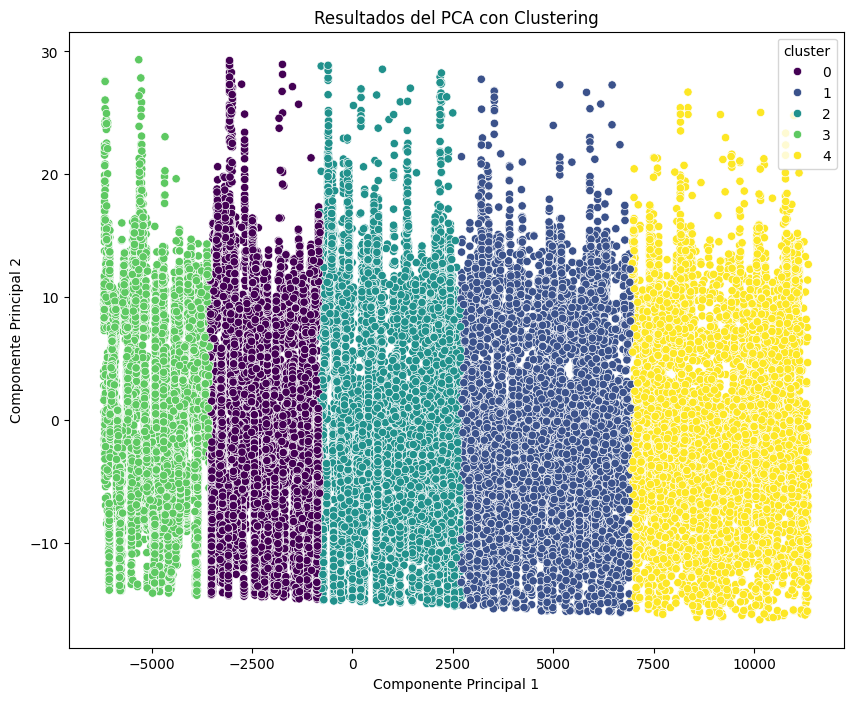

In [90]:
# Visualización con clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Resultados del PCA con Clustering')
plt.show()

**Interpretación del Gráfico**
- Agrupaciones Distintas:
 
Cada color representa un cluster diferente identificado por K-means en el espacio de los dos principales componentes del PCA. Las claras divisiones verticales sugieren que los componentes principales están capturando aspectos significativos de los datos que permiten diferenciar entre grupos.

- Implicaciones de los Componentes:
1) Componente Principal 1 (CP1): Dado que este eje tiene un rango mucho más amplio y muestra una segregación clara de los clusters, es probable que CP1 capture la variabilidad más significativa en los datos relacionada con las diferencias más sustanciales entre los registros.
2) Componente Principal 2 (CP2): Aunque CP2 también ayuda a diferenciar entre algunos clusters (especialmente en las extremidades del rango), su contribución parece ser secundaria comparada con CP1.

**5.4. Resultados arrojados por los modelos entrenados: Random Forest, KNN y SVM**

In [91]:
# Resultados de modelos
print("Resultados de la precisión de los modelos:", resultados)

Resultados de la precisión de los modelos: {'Random Forest': 0.8522064126942496, 'KNN': 0.909841977575241, 'SVM': 0.6464494131532359}


**5.5. Implementación de Validación Cruzada al modelo Random Forest**

In [92]:
# Configuración de K-Fold para la validación cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [93]:
# Configuración del modelo
rf_modelo = RandomForestClassifier(n_estimators=100, random_state=42)


In [94]:
# Validación cruzada
scores = cross_val_score(rf_modelo, X, y, cv=kf, scoring='accuracy', n_jobs=-1)

In [95]:
# Imprimir los resultados de cada fold
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: {score}")

Fold 1: 0.8564122738001574
Fold 2: 0.8543141883031734
Fold 3: 0.8574613165486493
Fold 4: 0.8463152373459218
Fold 5: 0.8539016393442623
Fold 6: 0.8630819672131148
Fold 7: 0.8594098360655738
Fold 8: 0.8582295081967213
Fold 9: 0.8563934426229508
Fold 10: 0.8478688524590164


In [96]:
# Imprimir la precisión media
print("Precisión media:", np.mean(scores))

Precisión media: 0.8553388261899542


## 6. Resultados ## 

**6.1. Interpretación de resultados**

**6.1.2. Fundamentos para la elección del Modelo de Random Forest**

Después de considerar los resultados de precisión y las características inherentes de cada modelo, se seleccionó Random Forest como el modelo óptimo para este proyecto.

Random Forest, con una precisión del 85.22%, demostró ser altamente efectivo, superando a SVM y quedando ligeramente por debajo de KNN en términos de precisión. La decisión de elegir Random Forest sobre otros modelos se basó en varios factores críticos:

- Robustez y Generalización:

Random Forest es conocido por su robustez y su capacidad para generalizar bien a partir de los datos de entrenamiento. Al utilizar múltiples árboles de decisión para tomar la decisión final, el modelo reduce el riesgo de sobreajuste, algo especialmente importante en nuestro dataset diverso y complejo.

- Manejo de Variables No Lineales:

Este modelo es eficaz para manejar interacciones no lineales entre variables sin necesidad de transformaciones explícitas, lo cual es crucial dado que las características de nuestro dataset incluyen tanto numéricas como categóricas.

- Importancia de las Características:

Una ventaja significativa de Random Forest es su capacidad para proporcionar insights sobre la importancia de las características. Esto es esencial para nuestro análisis ya que buscamos entender no solo las predicciones, sino también qué variables influyen más en la probabilidad de robo de un auto.

- Eficiencia Computacional: 

Aunque KNN mostró una precisión ligeramente superior, Random Forest ofrece una mejor eficiencia computacional para nuestro volumen de datos, lo que facilita un procesamiento más rápido sin un hardware especializado.


**6.1.3. Comparación de rendimiento de Random Forest antes y después de aplicar Validación Cruzada**
- Rendimiento Antes de la Validación Cruzada:

Precisión: 85.22%

- Rendimiento Con la Validación Cruzada (K-Fold):

Precisión media: 85.53%

- Rango de precisión entre los folds:
 
Mínimo 84.63% 

Máximo 86.31%


**6.1.4. Análisis de los cambios en el rendimiento del modelo**

1. Estabilidad del Modelo:

La aplicación de la validación cruzada muestra una variabilidad en el rendimiento del modelo entre diferentes folds, con un rango que va desde un mínimo de 84.63% hasta un máximo de 86.31%. Esto indica una variabilidad moderada en el rendimiento del modelo, que puede ser un reflejo de la sensibilidad del modelo a diferentes subconjuntos del dataset. La validación cruzada ha demostrado que el modelo es generalmente estable, pero con ligeras fluctuaciones dependiendo de la porción específica de datos utilizada para entrenamiento y prueba.

2. Mejora en la Precisión Media:

La precisión media después de aplicar la validación cruzada (85.53%) es ligeramente superior a la precisión obtenida sin validación cruzada (85.22%). Este incremento, aunque pequeño, es significativo porque sugiere que el modelo, cuando evaluado de manera más robusta y exhaustiva a través de múltiples subconjuntos de datos, puede alcanzar un rendimiento ligeramente mejor en promedio.

3. Razones para la Variabilidad y Mejora:

- Diversidad de Datos en Folds: 

Algunos folds pueden contener patrones de datos más fáciles de predecir debido a las características inherentes de esos subconjuntos, lo que puede llevar a resultados mejores en algunos folds.

- Reducción del Sobreajuste:

La validación cruzada ayuda a mitigar el riesgo de sobreajuste al asegurarse de que el modelo sea probado en múltiples configuraciones de datos independientes. Esto puede contribuir a la ligera mejora en la precisión media observada.

- Consistencia del Modelo: 

La relativa consistencia de la precisión a través de los folds también valida la robustez del modelo Random Forest, que es capaz de manejar bien la variabilidad dentro del dataset sin ajustes extremos en su rendimiento.